## **K-Means Clustering**


##### **Import libraries**

In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

##### **Load and Display Dataset**

In [360]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Select features for clustering

In [361]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [362]:
X.shape

(200, 2)

In [363]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


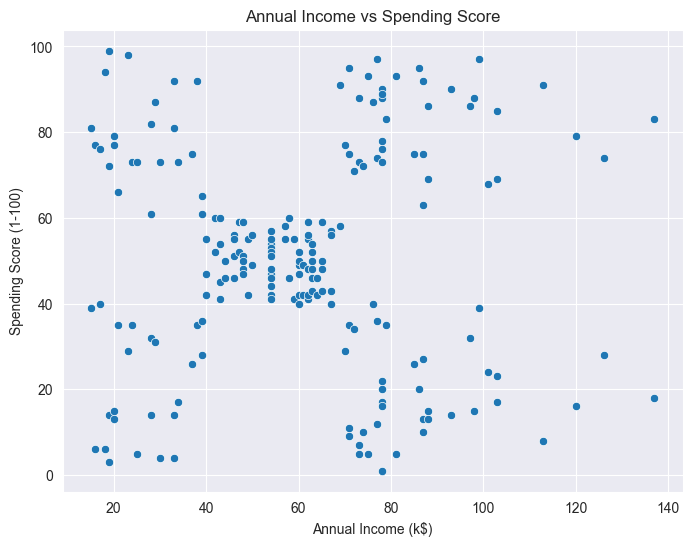

In [364]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.show()

#### **Using the Elbow Method to Determine the Optimal Number of Clusters**

In [365]:
from sklearn.cluster import KMeans

In [366]:
wcss = []
k_range = range(1, 10)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

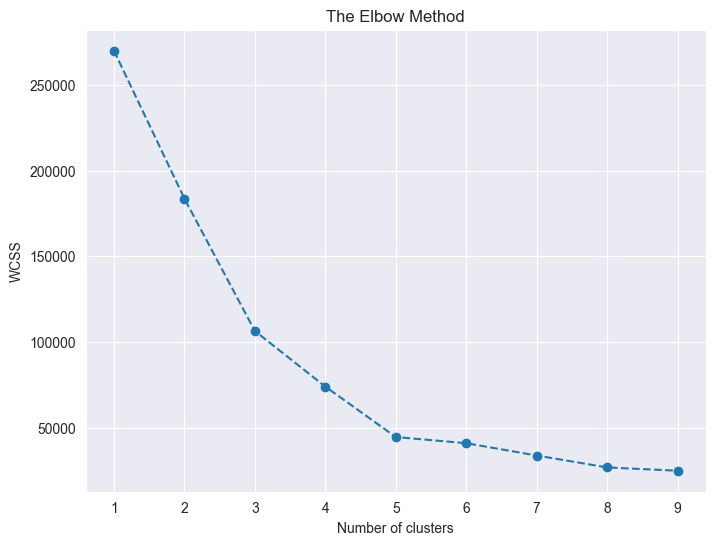

In [367]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, "--o")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### **Training the K-Means Model on the Dataset**


In [368]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

##### **Plot Clustered Data With Centroids**

In [369]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

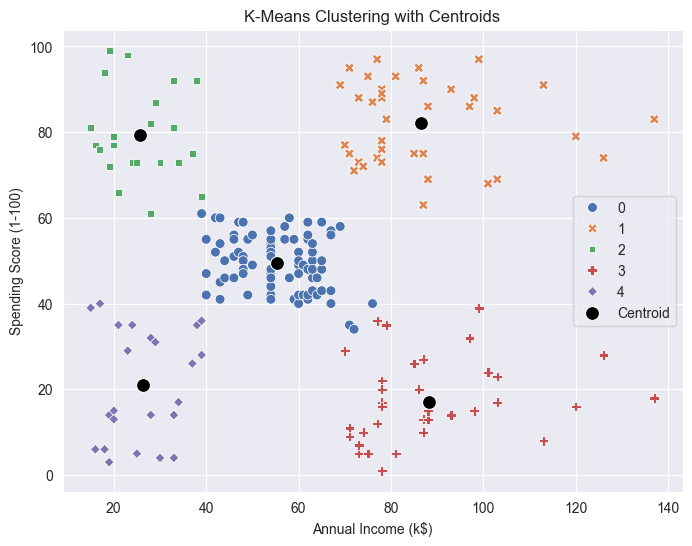

In [370]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=X,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue=y_kmeans,
    style=y_kmeans,
    palette="deep",
    s=50
)
sns.scatterplot(
    x=cluster_centers[:, 0],
    y=cluster_centers[:, 1],
    color="black",
    label="Centroid",
    s=100,
)
plt.title("K-Means Clustering with Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()